In [2]:
import numpy as np

filename = "iris.csv"

numSamples = 150
numFeatures = 4

## Point1: Load the Dataset

In [3]:
def loadIrisDataset(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")
    
    #extract the 4 features and insert them into D
    D = rawData[:, 0:4] #D shape: (150, 4)
    D = np.array(D, np.float32).T  #Dont't do reshape! Because I want onr row= 150 samples of the same feature! .reshape((numFeatures, numSamples))

    #L_string = rawData[:, 4].reshape((numSamples, 1))  
    classLabels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    L = np.array([classLabels[name] for name in rawData[:, 4]], dtype=int) #.reshape((numSamples, 1)) #I want a column vector of shape (150, 1)
    

    return D, L

In [4]:
D, L = loadIrisDataset(filename)

In [5]:
L[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
D[0, :]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

In [7]:
print("D shape:", D.shape)
print("L shape:", L.shape)

D shape: (4, 150)
L shape: (150,)


D has 4 rows (one row = one different feature), and 150 columns (1 column = 1 sample)
L is a row vector having all the class labels
D[i, j] -> i identifies the the FEATURE (0 to 3), j identifies the SAMPLE (0 to 149)

In [8]:
print("first sample, first feature:", D[0, 0])
print("first sample, second feature:", D[1, 0])
print("first element, third feature:", D[2, 0])
print("first element, fourth feature:", D[3, 0])
print("first element, class Label:", L[0])

first sample, first feature: 5.1
first sample, second feature: 3.5
first element, third feature: 1.4
first element, fourth feature: 0.2
first element, class Label: 0


In [9]:
finalList = []
for row in D:
    finalList.append(row)
finalList.append(L)

finalList

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3

## Point 2: Visualizing DataSet

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = finalList[:4]
y = finalList[-1]
#x[0][0]
x[0][:] #first feature, 150 samples

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

### Class labels are ORDERED: FIRST LABEL 0 (SETOSA), THEN 1 (VERSICOLOR), THEN 2 (VIRGINICA)

In [12]:

def densityFeaturePlots(x, y):
    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}
    for i in range(numFeatures):
        plt.figure(figsize=(6,4))
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            #print(sample_with_that_class)
            plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            plt.legend()  # Mostra la legenda

        plt.title(f"Feature {featuresNames[i]} Distribution")
        plt.xlabel(featuresNames[i])
        plt.ylabel("Density")
        plt.show()

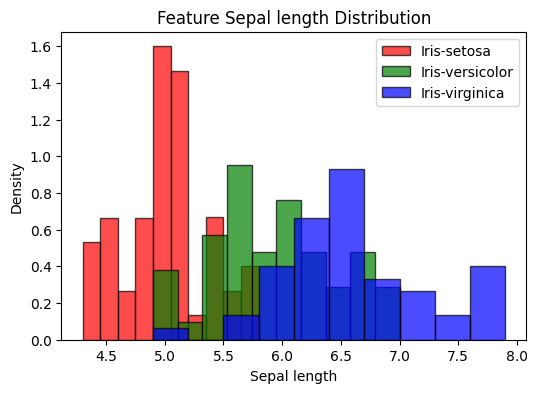

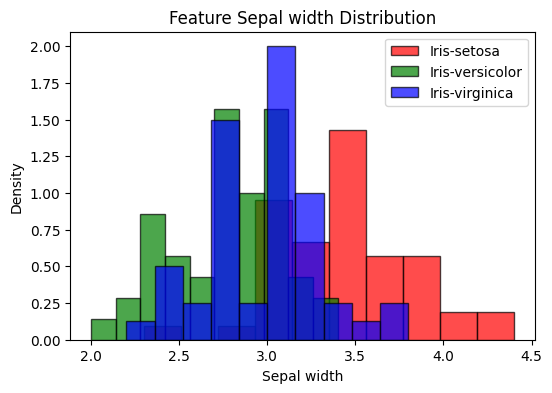

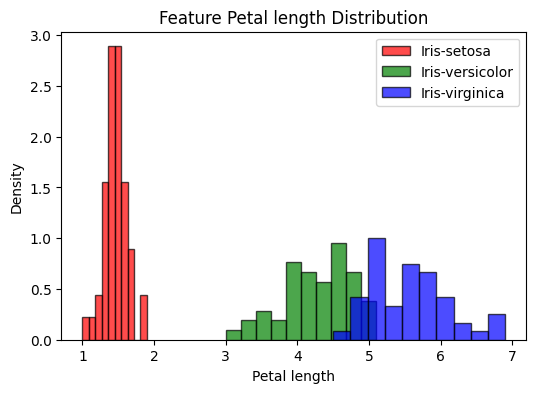

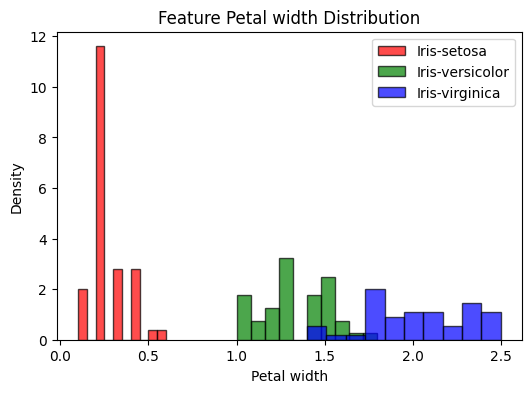

In [13]:
#Plot the four density histograms
densityFeaturePlots(x, y)

We can observe that there is large overlap for the first two features, whereas values for the third and
fourth features of iris-setosa are well separated from those of the other two flower families.

We now consider pairs of values and visualize the scatter plots of the different feature pairs for each class.

In [14]:

def scatterPlots(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 4
    rows = 4

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

## Point 3: Statistics Computation

### Dataset Mean

In [15]:
D.shape

(4, 150)

The for loop is, in general, slow. Numpy allows
computing the mean of an array through the method .mean. The method allows specifying an axis —
for 2-D arrays, axis = 0 allows computing the mean over rows, whereas axis = 1 allows computing
the means over columns

In [16]:
mu = D.mean(axis=1) #over columns
mu

array([5.8433347, 3.0573332, 3.7580001, 1.1993335], dtype=float32)

In [17]:
mu.shape

(4,)

Pay attention to the shape of D.mean(1): it’s a 1-D array, thus we convert it to a column vector through
the .reshape method

In [18]:
mu = mu.reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [19]:
mu.shape

(4, 1)

We now exploit broadcasting to **center the data**, i.e. to **remove the mean from all points**. Notice that we want the mean to be a column vector, so we first reshape it.

In [20]:
DC = D - mu #D centered, so with every element - mu
print(f"Before centering: {D[0][0:10]}\nAfter centering: {DC[0][0:10]}")

Before centering: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
After centering: [-0.7433348  -0.9433346  -1.1433349  -1.2433348  -0.8433347  -0.44333458
 -1.2433348  -0.8433347  -1.4433346  -0.9433346 ]


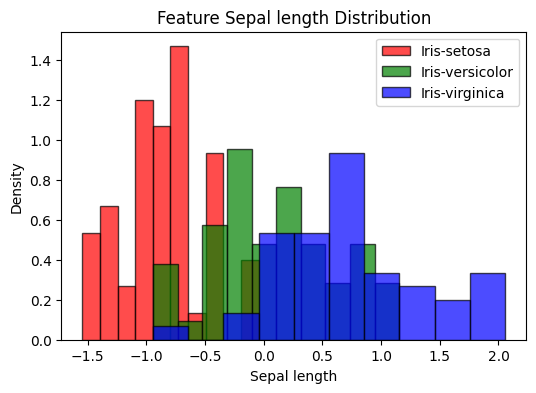

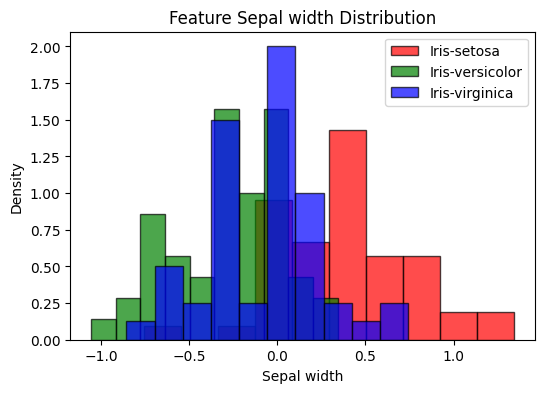

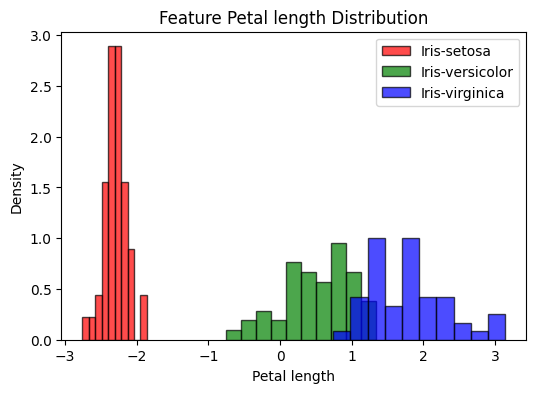

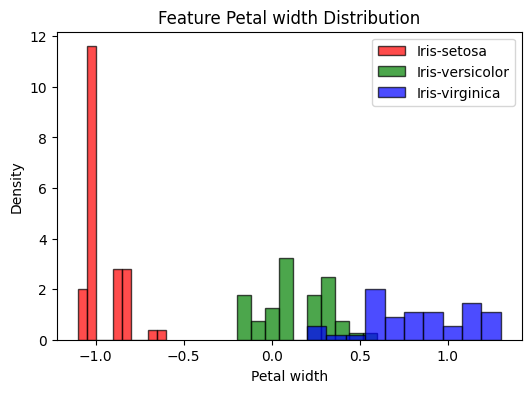

In [21]:
#Now I plot again the data that is now centered (the D vector changes)
x = DC

densityFeaturePlots(x, y)

Since the x are now centered, the x axis range is significantly smaller in the four plots

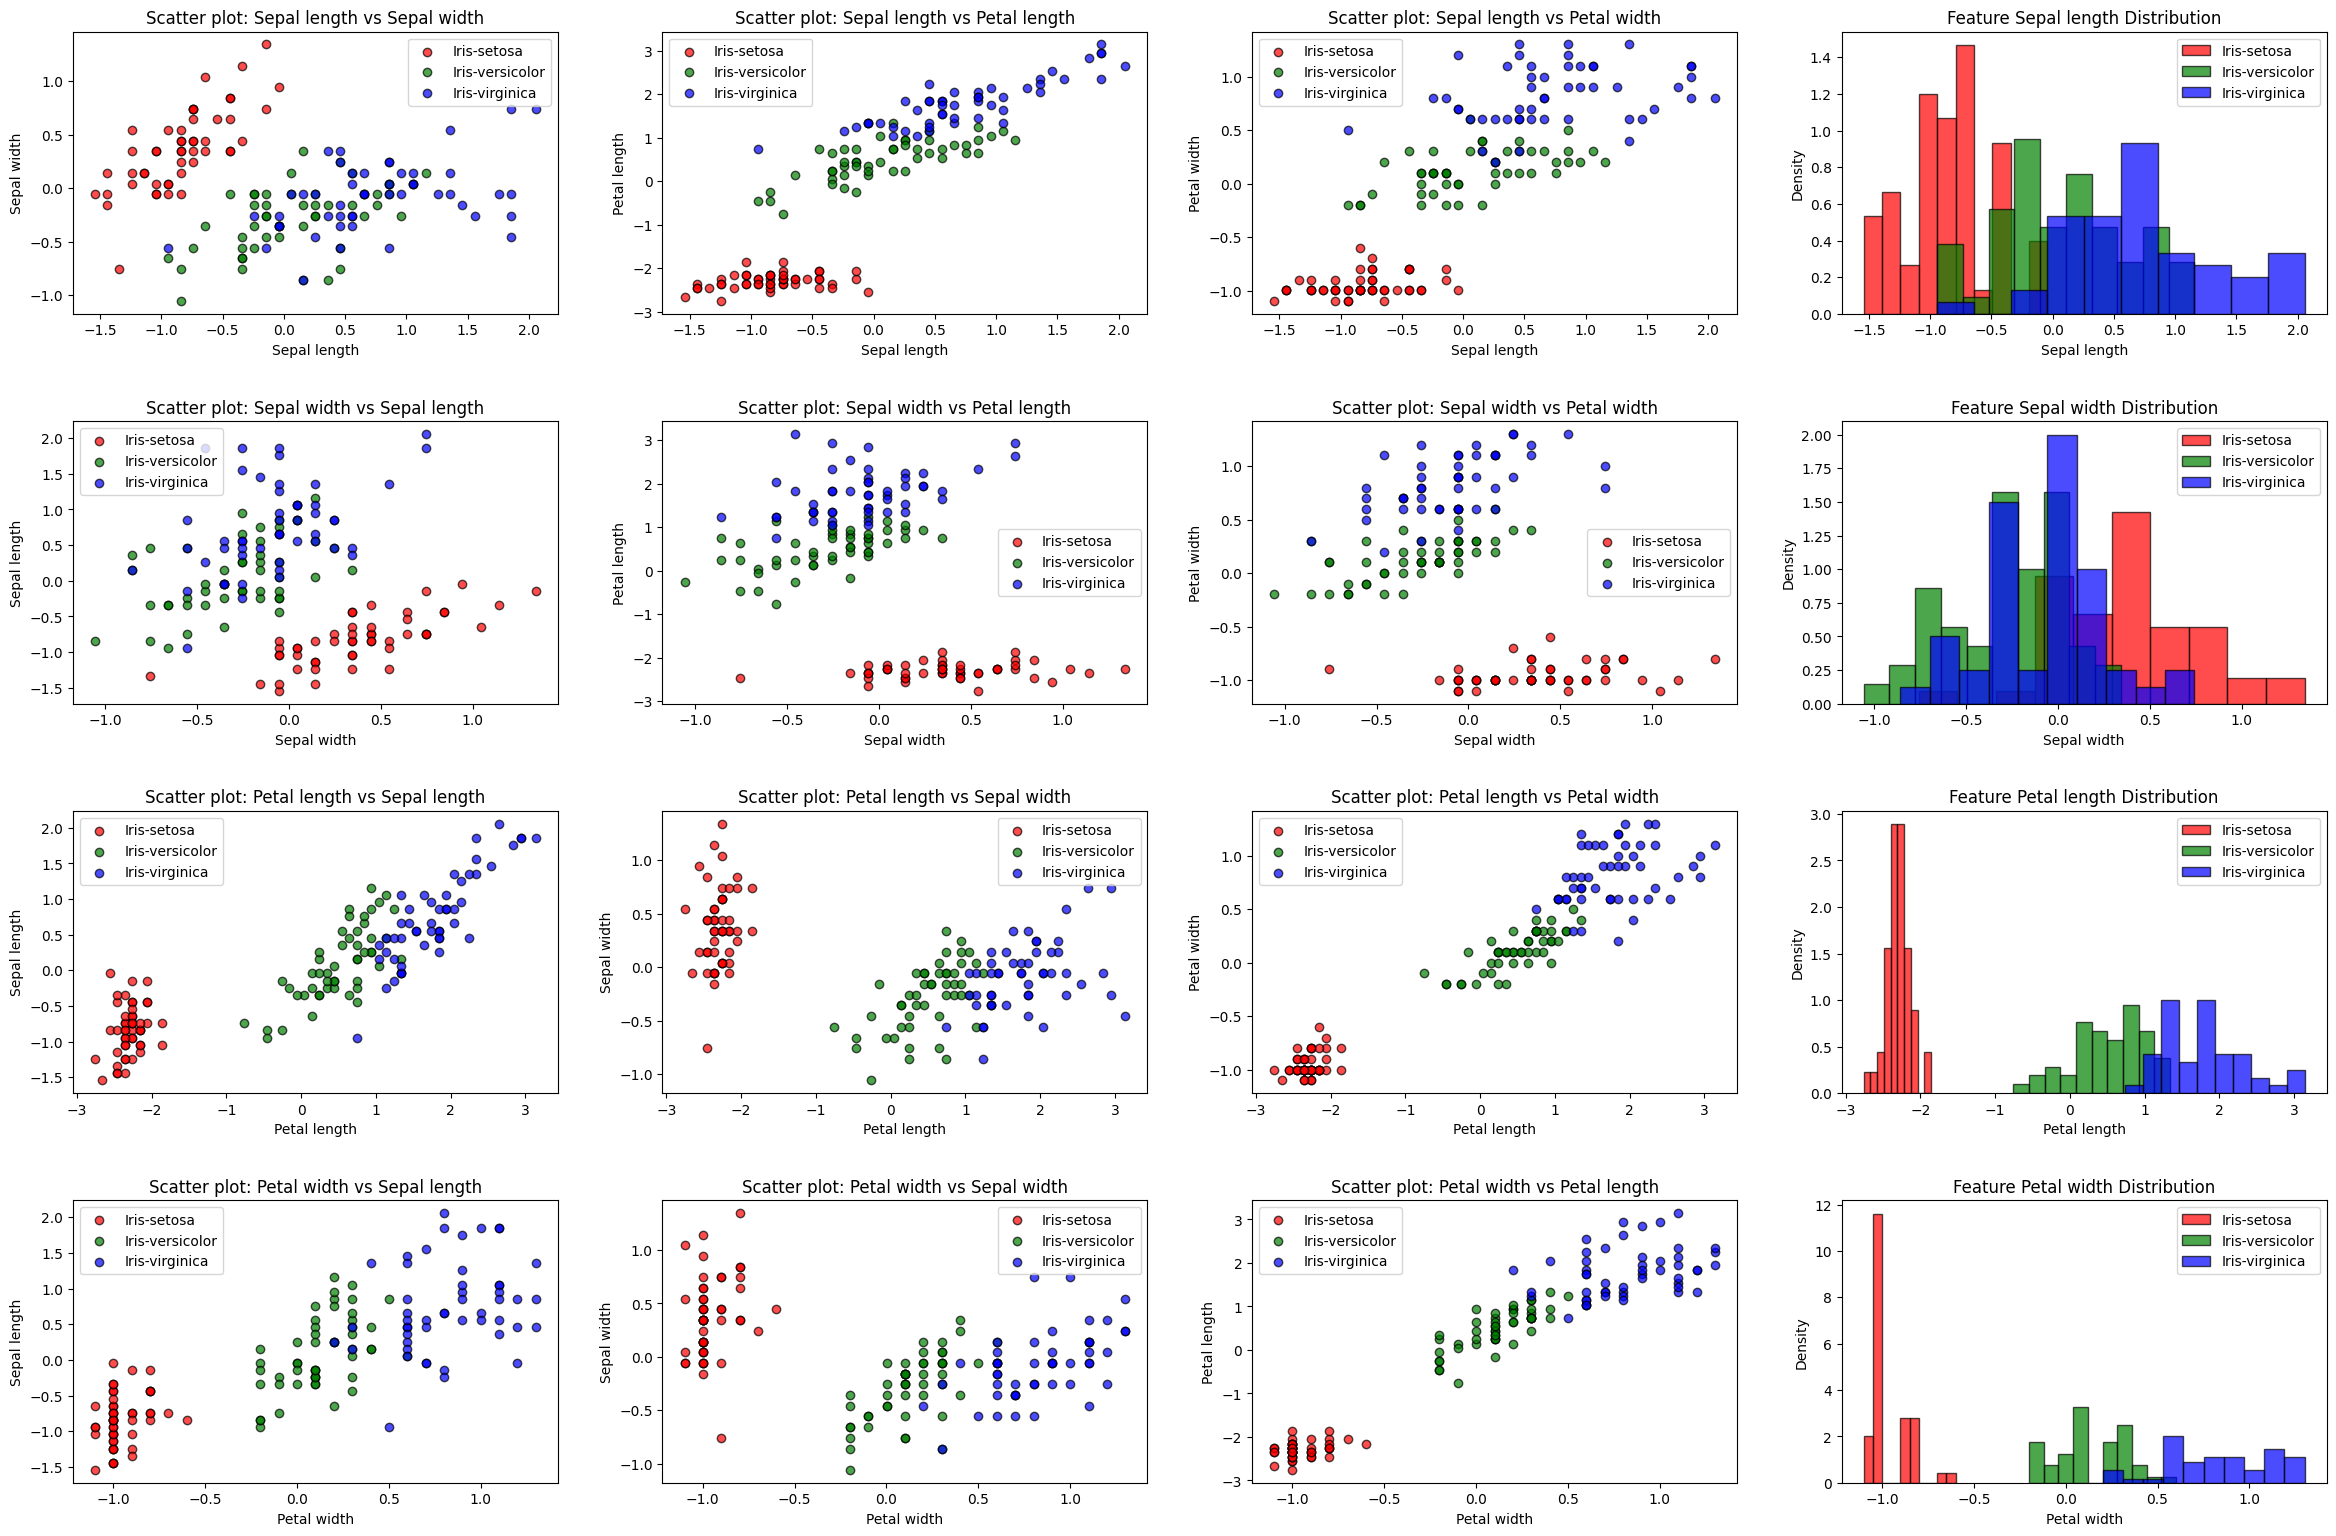

In [22]:
#Now I plot again the 16 scatterplots
x = DC
scatterPlots(x, y)

Now both the y and the x axis in the scatter plots have way smaller ranges since all the features values are centered.

### Covariance Matrix

The standard way of computing the covariance would be: <br> 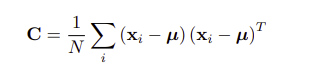

We can compute the covariance matrix using a for loop: <br>
```python
C = 0
for i in range(D.shape[1]):
C += (D[:, i:i+1] - mu) @ (D[:, i:i+1] - mu).T
C = C / float(D.shape[1])
``` 
<br>
Also in this case, the loop is slow. We can observe that we can arrange computations to express the
covariance matrix as: <br>

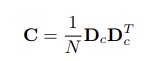

where Dc is the centered D numpy vector. <br>
In python:
```python
C = (DC @ DC.T) / float(D.shape[1])
```
where ```DC = D - mu```

In [23]:
#Compute the Covariance Matrix C using DC = D - mu
C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

In [24]:
C.shape

(4, 4)

The shape of the Covariance Matrix is (4,4) (it's always a square matrix) since we have four features and we compute the covariance for each **pair** of features!

In [25]:
C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

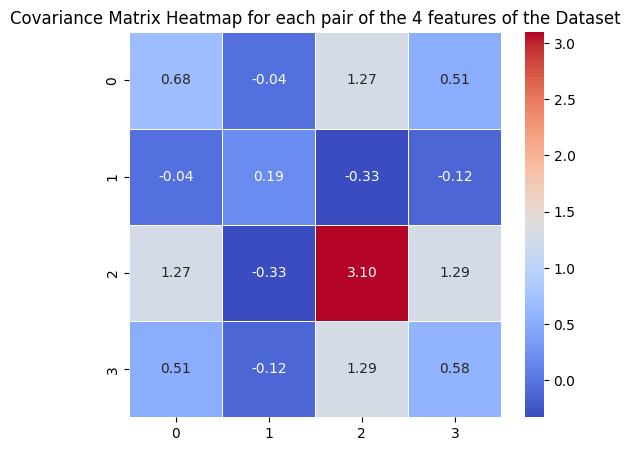

In [26]:
#Better representation with seaborn
#Seaborn function heatmap is more optimized than motplotlib function imshow so I use seaborn
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Covariance Matrix Heatmap for each pair of the 4 features of the Dataset")
plt.show()

# LAB3

## Dimensionality Reduction


### PCA - Principal Components Analysis

In [27]:
# mu is the mean computed on the columns of the D matrix of features: mu = D.mean(axis=1).reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [28]:
# C is the Covariance Matrix for the iris dataset, already computed before on the centered features DC = D - mu:


#Compute the Covariance Matrix C using DC = D - mu
#C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

In [29]:
print(f"Is C a square matrix? {C.shape}")

Is C a square matrix? (4, 4)


In [30]:
print(f"Is C a symmetrix matrix?\n {C == C.T}")

Is C a symmetrix matrix?
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


<ul>
<li> C is a square matrix
<li> C is symmetric (C = C.T) <br>
</ul>

-> **I can use eigen-decomposition**

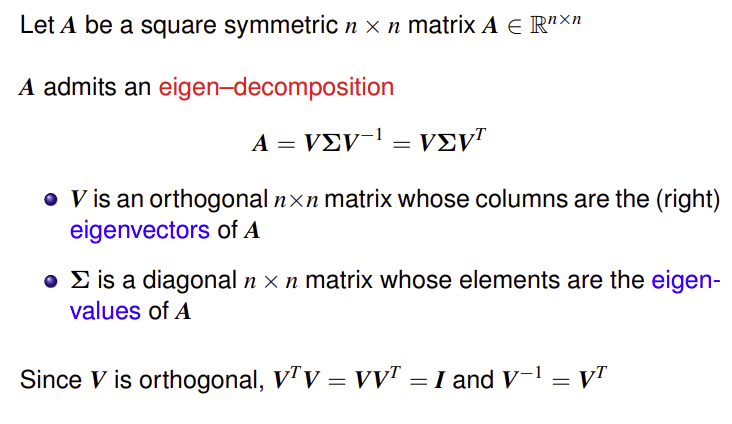

In [31]:
#Use numpy.linalg.eig vs numpy.linalg.eigh

#s = sigma, diagonal matrix containing the eigen valuez
#U = V, orthogonal matrix whose columns are the eigen vectors 

#1. Using numpy.linalg.eig the result are not sorted
s, U = np.linalg.eig(C)
print(f"Using eig:\n s: {s}\n U: {U}")

#2. Using numpy.linalg.eigh the result are sorted from  smallest to largest eigenvalues
s, U = np.linalg.eigh(C)
print(f"\nUsing eigh:\n s: {s}\n U: {U}")

#We will mainly use eigh in this case
print(f"\nShape of s: {s.shape}\nShape of U: {U.shape}")

Using eig:
 s: [4.2000546  0.24105279 0.07768784 0.02367693]
 U: [[ 0.36138648 -0.65658814 -0.58203006  0.3154882 ]
 [-0.08452249 -0.7301621   0.5979094  -0.3197243 ]
 [ 0.85667074  0.1733726   0.07623544 -0.4798389 ]
 [ 0.35828903  0.07548022  0.5458329   0.75365657]]

Using eigh:
 s: [0.02367693 0.07768784 0.24105279 4.2000546 ]
 U: [[ 0.3154882   0.58203006  0.65658814 -0.36138648]
 [-0.3197243  -0.5979094   0.7301621   0.08452249]
 [-0.4798389  -0.07623544 -0.1733726  -0.85667074]
 [ 0.75365657 -0.5458329  -0.07548022 -0.35828903]]

Shape of s: (4,)
Shape of U: (4, 4)


U is 4x4, in fact the dataset has 4 featues! So the original space has **4 dimensions**. The columns of U are the eigen-vectors corresponding to related eigen-values of s, which are also four (obviously). <br>
Later on I will write a function to apply PCA given any (reasonable, so from 1 to 4 in this case) value of m. For now I will maintain m = 4 so I won't reduce the subspace dimensionality, just extract relevant info.

In [32]:
# Set m in this case
m = 4

#The m leading eigenvectors can be
#retrieved from U (here we also reverse the order of the columns of U so that the leading eigenvectors are
#in the first m columns):

P = U[:, ::-1][:, 0:m]  #first reverse order of U to show leading eigen-vector first (so from highest to lowest), then take just the FIRST m COLUMNS of U!

print(f"P is the subspace derived from PCA setting m={m}:\n{P}")
print(f"Shape of P: {P.shape}")

P is the subspace derived from PCA setting m=4:
[[-0.36138648  0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249  0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074 -0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903 -0.07548022 -0.5458329   0.75365657]]
Shape of P: (4, 4)


Since the covariance matrix is semi-definite positive, we can also get the sorted eigenvectors from the
**Singular Value Decomposition** (*SVD*). <br> This is the most general method used also for rectangular matrices, and generalizes eigen-decomposition:
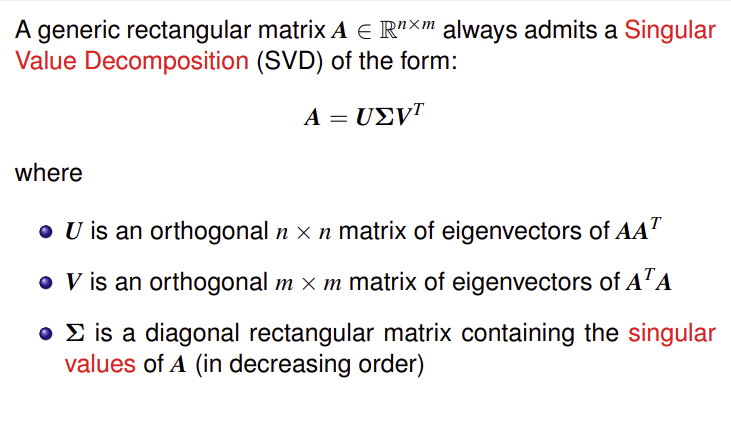

In [33]:
#U: left eigen vectors of A.T*A, so left singular vectors of A
#s = sigma -> singular values of A
#Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A

U, s, Vh = np.linalg.svd(C)

#In this case, the singular values (which are equal to the eigenvalues) are sorted in descending order, and
#the columns of U are the corresponding eigenvectors

print(f"U:\n{U}\nShape of U: {U.shape}\n")
print(f"s: {s}\nShape of s: {s.shape}\n")
print(f"Vh:\n{Vh}\nShape of Vh: {Vh.shape}")

U:
[[-0.36138648 -0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249 -0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074  0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903  0.07548022 -0.5458329   0.75365657]]
Shape of U: (4, 4)

s: [4.2000546  0.24105279 0.07768784 0.02367693]
Shape of s: (4,)

Vh:
[[-0.36138648  0.08452249 -0.85667074 -0.35828903]
 [-0.65658814 -0.7301621   0.1733726   0.07548022]
 [ 0.58203006 -0.5979094  -0.07623544 -0.5458329 ]
 [ 0.3154882  -0.3197243  -0.4798389   0.75365657]]
Shape of Vh: (4, 4)


### SVD vs Eigen Decomposition, computational costs

Svd is a generalization of Eigen Decomposition, so it works with every square symmetrix matrix as Eigen Decomposition, but also works with a borader range of cases (ex rectangular martrices). <br>

#### Computational Cost for Eigen decomposition:

1. We first have to compute the covariance matrix, which is $O(p^2 \cdot n)$.
2. Then Eigen Decomposition has a cost of $O(p^3)$.
3. So the total cost is $O(p^2 \cdot n + p^3)$.

#### Computational Cost for SVD:

SVD has a cost which is $O(min \{p^2 \cdot n, n^2 \cdot p\})$
-> This is usually more efficient!!

-> **You can always prefer SVD over Eigen Decomposition**
 

In [34]:
m=4

P = U[:, 0:m]

P

array([[-0.36138648, -0.65658814,  0.58203006,  0.3154882 ],
       [ 0.08452249, -0.7301621 , -0.5979094 , -0.3197243 ],
       [-0.85667074,  0.1733726 , -0.07623544, -0.4798389 ],
       [-0.35828903,  0.07548022, -0.5458329 ,  0.75365657]],
      dtype=float32)

Now, the last thing to do is to project the data in the subspace spanned by the m columns
of U corresponding to the m highest eigenvalues (matrix P) using projection rules:

<ul>
<li>y = P.T * x -- if we have a point x
<li>DP = P.T @ D -- if we have a matrix of samples D
</lu>

In [35]:
#Find the samples projected onto P:

DP = P.T @ D #it's the same as: DP = np.dot(P.T, D)

print(f"Shape of DP: {DP.shape}")
print(f"All the four features for each of the first 10 samples of the projected samples DP:\n{DP[:, :10]}")

Shape of DP: (4, 150)
All the four features for each of the first 10 samples of the projected samples DP:
[[-2.8182392  -2.7882233  -2.6133742  -2.757022   -2.7736483  -3.2215052
  -2.681827   -2.87622    -2.6159823  -2.829609  ]
 [-5.646349   -5.1499505  -5.1820025  -5.0086527  -5.6537066  -6.068283
  -5.237491   -5.490337   -4.74864    -5.2131777 ]
 [ 0.65977424  0.842323    0.6139584   0.6002993   0.54178035  0.46318242
   0.37396663  0.65373856  0.61109895  0.82949173]
 [-0.03108844  0.06567613 -0.01338259 -0.10892666 -0.09460958 -0.057552
  -0.08149443 -0.07864869 -0.06009554 -0.08964584]]


In [36]:
np.save(f"IRIS_PCA_matrix_m{m}.npy", P)

# np.load("IRIS_PCA_matrix_m4.npy") to load back the P matrix from the file

### Function for PCA

In [37]:
def computeC(D):
    '''
    Params:
    - D: Dataset features matrix, not centered

    Returned Values:
    - C: Covariance matrix of centered D
    '''
    
    mu = D.mean(axis = 1)                       #compute mu as a row array
    mu = mu.reshape((mu.shape[0], 1))           #reshape mu as a column array
    DC = D - mu                                 #center D
    C = (DC @ DC.T) / float(DC.shape[1])        #compute C, the Covariance Matrix, from DC

    return C

In [38]:
def calculatePCA(D, m):
    '''
    Params:
    - m: dimensionality of target subspace (m has to be <= dimensionality of original space of D)
    - D: Dataset features matrix, not centered

    Returned Values:
    - P: the subspace whose dimensionality is m
    '''

    #1. Compute C, the Covariance Matrix
    C = computeC(D)

    #2. Use SVD since it's usually more efficient than Eigen Decomposition and cover a broaders range of cases
    #   U: left eigen vectors of A.T*A, so left singular vectors of A
    #   s = sigma -> singular values of A
    #   Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A
    U, s, Vh = np.linalg.svd(C)

    #3. The Eigen Values are already sorted from the largest to the smallest
    #   Take just the leading m Eigen Vectors describing the subspace P
    P = U[:, 0:m]

    #4. Return the subspace P
    return P



In [39]:
def applyPCA(D, P):
    '''
    Params:
    - D: Dataset features matrix, not centered
    - P: Subspace onto which you want to project the samples D
    '''

    #using np.dot or @ is the same
    return P.T @ D  #return np.dot(P.T, D)

### Testing PCA with m = 2, so reducing 2 dimensions from the original space

In [40]:

# Subspace P of m = 2 dimensions
m = 2
P_2 = calculatePCA(D, m)

print(f"Subspace caculated:\n {P_2}")

# Apply PCA and return the samples projected onto P

DP_2 = applyPCA(D, P_2)

print(f"Shape of DP_{m}: {DP_2.shape}") #shape is now (2, 150), not (4, 150) anymore! Dimensionality Reduction!
print(f"All the features for each of the first 10 samples of the projected samples DP_{m}:\n{DP_2[:, :10]}")

Subspace caculated:
 [[-0.36138648 -0.65658814]
 [ 0.08452249 -0.7301621 ]
 [-0.85667074  0.1733726 ]
 [-0.35828903  0.07548022]]
Shape of DP_2: (2, 150)
All the features for each of the first 10 samples of the projected samples DP_2:
[[-2.8182392 -2.7882233 -2.6133742 -2.757022  -2.7736483 -3.2215052
  -2.681827  -2.87622   -2.6159823 -2.829609 ]
 [-5.646349  -5.1499505 -5.1820025 -5.0086527 -5.6537066 -6.068283
  -5.237491  -5.490337  -4.74864   -5.2131777]]


Now 2 features (the last 2) are gone, and I have just the first 2 features -> they are related to the leading eigen vectors!

In [41]:
def scatterPlots2(x, y, numFeatures):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 2

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

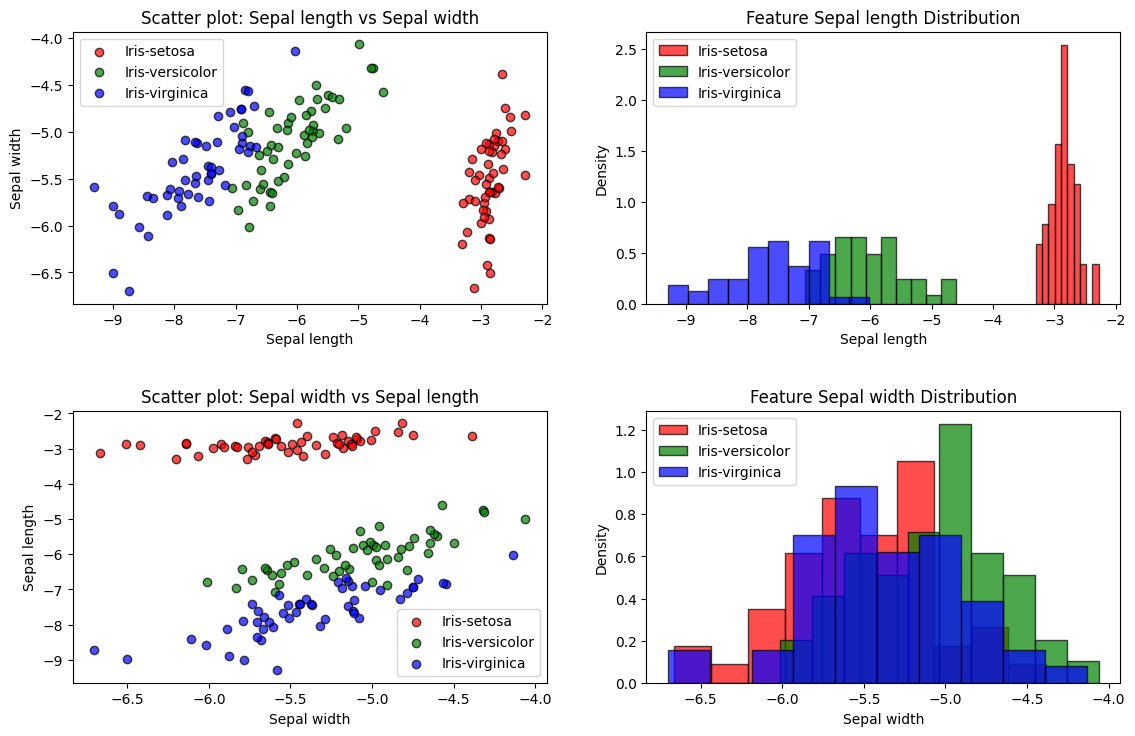

In [42]:
# Scatter Plot of the 2 components
scatterPlots2(DP_2, y, DP_2.shape[0])

**NOTE: your image may be flipped over one or both axes, due to the fact that eigenvectors are defined up to their sign. Flipping the sign of an eigenvector would result in a flipped image, but the solutions are equivalent.**

## LDA - Linear Discriminant Analysis

The goal is to compute the LDA Transformation Matrix, **W**. <br>
We start by computing the between and within class covariance matrices: <br> <br>
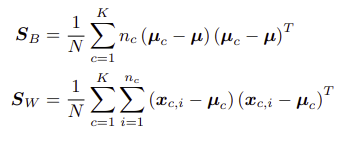


In [43]:
# select alla samples of class 0
D_c0 = D[:, L==0]
print(f"All samples of class 0:\n{D_c0}\n")
print(f"Shape: {D_c0.shape}")

All samples of class 0:
[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
  1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
  1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
 [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]]

Shape: (4, 50)


In [57]:
#Compute Sw, Sb

def computeSwSb(D, L):
    '''C
    Params:C
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples

    Returned Values:
    - Sw: Within-class scatter matrix
    - Sb: Between-class scatter matrix
    '''

    #find the number of classes (classes are numerical values) 
    numClasses = L.max() + 1

    #nc in the formula is computed as the number of samples of class c
    #separate data into classes
    DC = [D[:, L == label] for label in range(numClasses)]  #DC[0] -> samples of class 0, DC[1] -> samples of class 1 etc...

    #compute nc for each class
    #each element in DC has a shape which is (4, DC_i.shape[1]) (assuming samples are not equally distributed among all the classes which is true in 99% of cases...)
    #So for nc I just have to take DC_i.shape[1] for each i in DC
    nc = [DC_i.shape[1] for DC_i in DC]

    #Compute the mean as done before with PCA
    mu = D.mean(axis=1)
    mu = mu.reshape((mu.shape[0], 1))

    #Now compute the mean for each class
    muC = [DC[label].mean(axis=1) for label in range(numClasses)]
    muC = [mc.reshape((mc.shape[0], 1)) for mc in muC]

    Sb = 0  #between matrix initialization
    Sw = 0  #within  matrix initialization

    #iterate over all the classes to execute the summations to calculate the 2 matrices
    for label in range(numClasses):

        #1) FOR SB:
        #add up to the Sb (between) matrix
        diff = muC[label] - mu
        Sb += nc[label] * (diff @ (diff.T)) #nc * ((muC - mu) * (muC - mu).T)


        #2) FOR SW
        #add up to the Sw (within) matrix
        diff1 = DC[label] - muC[label]  #x_{c, i} - muC done by rows

        #SHORTCUT: compute the Sw matrix as a weighted sum of the covariance matrices of each class
        #so for each class:
        #Compute the Covariance Matrix C using DC = D - mu
        C_i = (diff1 @ diff1.T) / float(diff1.shape[1])  #Covariance matrix for class i

        #weighted sum of all the C_i
        Sw += nc[label] * C_i

    
    #at the end of the summations, just multiply by 1/N (N is the number of samples)

    Sb = Sb / D.shape[1]
    Sw = Sw / D.shape[1]

    #return both matrices
    return Sb, Sw
        


In [58]:
Sb, Sw = computeSwSb(D, L)
print(f"Sb matrix:\n{Sb}\nShape:{Sb.shape}\n")
print(f"Sw matrix:\n{Sw}\nShape:{Sw.shape}")

Sb matrix:
[[ 0.42141423 -0.133018    1.1016563   0.47519568]
 [-0.133018    0.07563294 -0.3815974  -0.15288445]
 [ 1.1016563  -0.3815974   2.9140193   1.2451603 ]
 [ 0.47519568 -0.15288445  1.2451603   0.53608906]]
Shape:(4, 4)

Sw matrix:
[[0.25970796 0.09086665 0.16416402 0.03763333]
 [0.09086665 0.11308001 0.05413865 0.032056  ]
 [0.16416402 0.05413865 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.04104401]]
Shape:(4, 4)
